In [2]:
import platform
from matplotlib import font_manager, rc

In [3]:
path = "C:/Windows/Fonts/malgun.ttf"
if platform.system() == "Windows":
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
elif platform.system()=="Darwin":
    rc('font', family='AppleGothic')
else:
    print("Unknown System")

In [4]:
import pandas as pd
import numpy as np

In [5]:
pd.options.display.float_format = '{:.3f}'.format

In [6]:
total = pd.read_csv('../data/한국가스공사_시간별 공급량_20181231.csv', encoding='cp949')
total.head()

,연월일,시간,구분,공급량
0,2013-01-01,1,A,2497.129
1,2013-01-01,2,A,2363.265
2,2013-01-01,3,A,2258.505
3,2013-01-01,4,A,2243.969
4,2013-01-01,5,A,2344.105


In [7]:
total

,연월일,시간,구분,공급량
0,2013-01-01,1,A,2497.129
1,2013-01-01,2,A,2363.265
2,2013-01-01,3,A,2258.505
3,2013-01-01,4,A,2243.969
4,2013-01-01,5,A,2344.105
...,...,...,...,...
368083,2018-12-31,20,H,681.033
368084,2018-12-31,21,H,669.961
368085,2018-12-31,22,H,657.941
368086,2018-12-31,23,H,610.953


In [8]:
# 연월일 열은 object형이므로 년, 월, 일로 나눈다.
total['연월일'] = pd.to_datetime(total['연월일'])
total['year'] = total['연월일'].dt.year
total['month'] = total['연월일'].dt.month
total['day'] = total['연월일'].dt.day
total['weekday'] = total['연월일'].dt.weekday

In [9]:
total.head()

,연월일,시간,구분,공급량,year,month,day,weekday
0,2013-01-01,1,A,2497.129,2013,1,1,1
1,2013-01-01,2,A,2363.265,2013,1,1,1
2,2013-01-01,3,A,2258.505,2013,1,1,1
3,2013-01-01,4,A,2243.969,2013,1,1,1
4,2013-01-01,5,A,2344.105,2013,1,1,1


In [10]:
total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 368088 entries, 0 to 368087
Data columns (total 8 columns):
 #   Column   Non-Null Count   Dtype         
---  ------   --------------   -----         
 0   연월일      368088 non-null  datetime64[ns]
 1   시간       368088 non-null  int64         
 2   구분       368088 non-null  object        
 3   공급량      368088 non-null  float64       
 4   year     368088 non-null  int64         
 5   month    368088 non-null  int64         
 6   day      368088 non-null  int64         
 7   weekday  368088 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(5), object(1)
memory usage: 22.5+ MB


# 그래프 찍어보기

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

In [12]:
total.groupby('구분')['공급량'].sum()

구분
A    61366289.574
B    50405162.046
C     6919290.914
D    34948717.369
E    73373435.269
G   108884947.375
H    13086403.736
Name: 공급량, dtype: float64

In [13]:
total['구분'].unique()

array(['A', 'B', 'C', 'D', 'E', 'G', 'H'], dtype=object)

Text(0.5, 1.0, '2013~2018년 구분별 공급량')

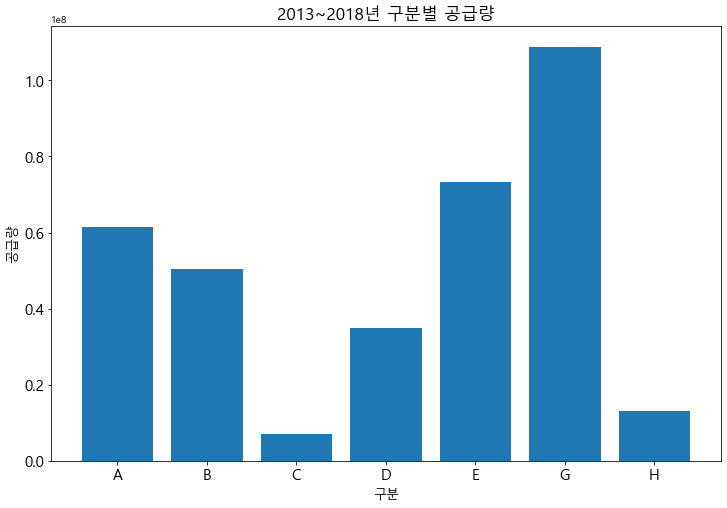

In [14]:
plt.figure(figsize=(12,8))
ax = plt.bar(total['구분'].unique(), total.groupby('구분')['공급량'].sum())
plt.xlabel('구분', fontdict={'fontsize':13})
plt.xticks(fontsize=15)
plt.ylabel('공급량', fontdict={'fontsize':13})
plt.yticks(fontsize=15)
plt.title('2013~2018년 구분별 공급량', fontdict={'fontsize':17})

In [15]:
total['구분'].unique()

array(['A', 'B', 'C', 'D', 'E', 'G', 'H'], dtype=object)

In [16]:
# 구분 열을 숫자로 바꾸기
d_map = {}
for i, d in enumerate(total['구분'].unique()):
    d_map[d] = i
total['구분'] = total['구분'].map(d_map)

<AxesSubplot:>

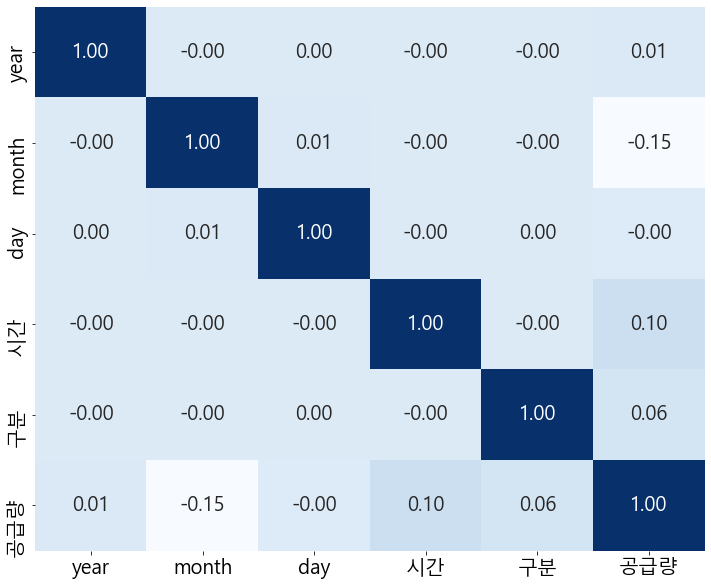

In [34]:
plt.figure(figsize=(12,10))
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
sns.heatmap(total[['year','month', 'day', '시간', '구분', '공급량']].corr(), cmap='Blues', annot=True, fmt='.2f', cbar=False, annot_kws={"size": 20})

In [18]:
total.groupby('year')['공급량'].sum()

year
2013   61437087.224
2014   56190306.731
2015   54368224.728
2016   55688652.160
2017   59102099.819
2018   62197875.621
Name: 공급량, dtype: float64

In [19]:
total['year'].unique()

array([2013, 2014, 2015, 2016, 2017, 2018], dtype=int64)

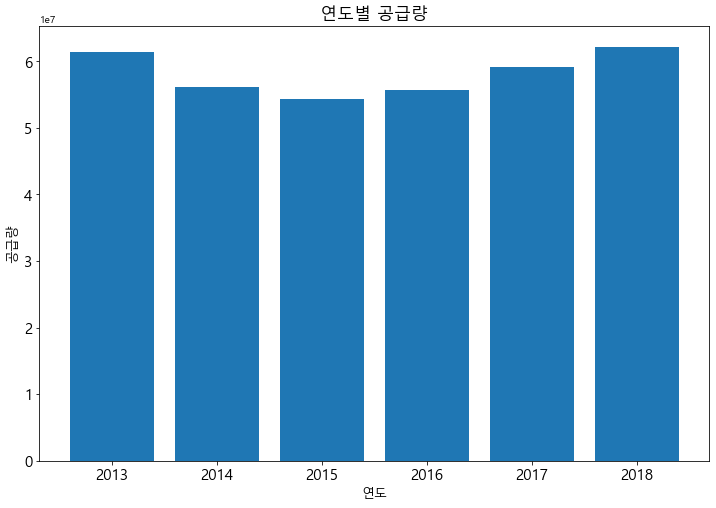

In [20]:
plt.figure(figsize=(12,8))
plt.bar(total['year'].unique(), total.groupby('year')['공급량'].sum())
plt.xlabel('연도', fontdict={'fontsize':13})
plt.xticks(fontsize=15)
plt.ylabel('공급량', fontdict={'fontsize':13})
plt.yticks(fontsize=15)
plt.title('연도별 공급량', fontdict={'fontsize':17})
plt.show()

In [21]:
total.groupby(['month'])['공급량'].sum()

month
1    57287111.717
2    47244454.788
3    37779855.295
4    24364714.883
5    17306877.573
6    14601541.678
7    14861803.985
8    14028395.328
9    14101327.917
10   19915652.098
11   34370393.964
12   53122117.057
Name: 공급량, dtype: float64

In [22]:
total['month'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int64)

Text(0.5, 1.0, '2013~2018년 월별 공급량')

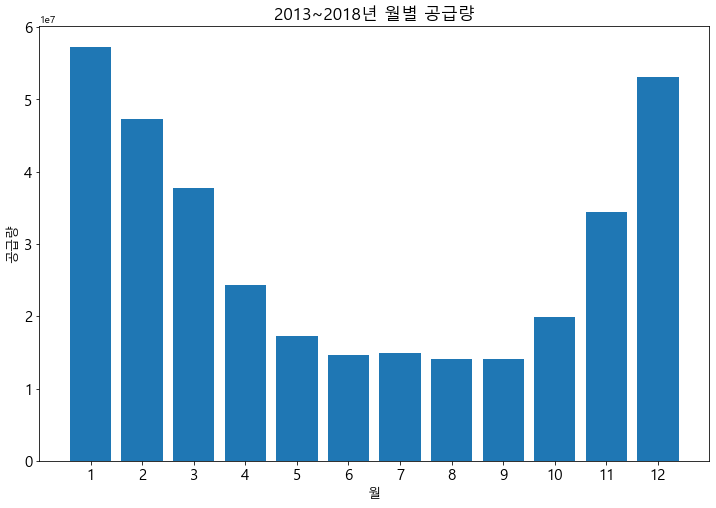

In [23]:
plt.figure(figsize=(12,8))
plt.bar(total['month'].unique(), total.groupby(['month'])['공급량'].sum())
plt.xlabel('월', fontdict={'fontsize':13})
plt.xticks(total['month'].unique(), fontsize=15)
plt.ylabel('공급량', fontdict={'fontsize':13})
plt.yticks(fontsize=15)
plt.title('2013~2018년 월별 공급량', fontdict={'fontsize':17})

In [24]:
total.groupby(['시간']).sum()

,구분,공급량,year,month,day,weekday
시간,,,,,,
1,46011,12596057.186,30911727,100058,241199,46011
2,46011,10481202.685,30911727,100058,241199,46011
3,46011,9391254.684,30911727,100058,241199,46011
4,46011,9672189.301,30911727,100058,241199,46011
5,46011,10975030.344,30911727,100058,241199,46011
6,46011,12087909.893,30911727,100058,241199,46011
7,46011,14653465.085,30911727,100058,241199,46011
8,46011,17942210.839,30911727,100058,241199,46011
9,46011,18224541.642,30911727,100058,241199,46011


In [25]:
total['시간'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24], dtype=int64)

Text(0.5, 1.0, '2013~2018년 시간별 공급량')

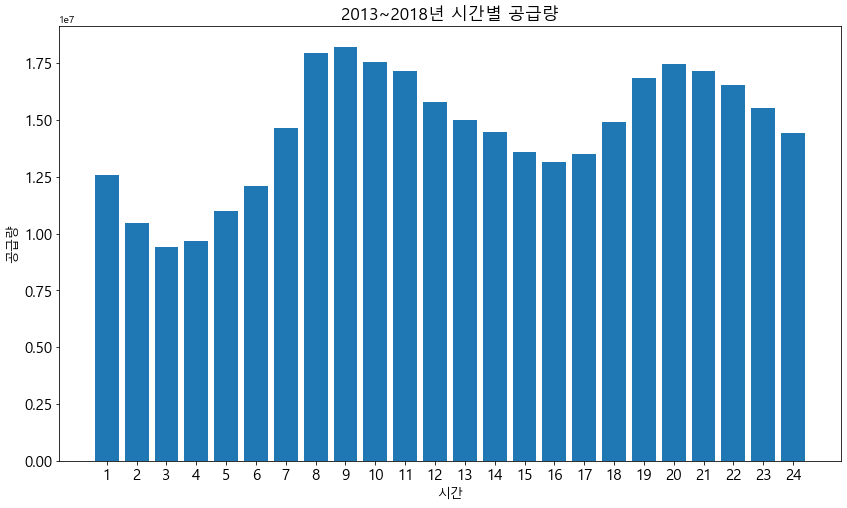

In [26]:
plt.figure(figsize=(14,8))
plt.bar(total['시간'].unique(), total.groupby(['시간'])['공급량'].sum())
plt.xlabel('시간', fontdict={'fontsize':13})
plt.xticks(total['시간'].unique(), fontsize=15)
plt.ylabel('공급량', fontdict={'fontsize':13})
plt.yticks(fontsize=15)
plt.title('2013~2018년 시간별 공급량', fontdict={'fontsize':17})

In [27]:
total.groupby(['weekday']).sum()

,시간,구분,공급량,year,month,day
weekday,,,,,,
0,657300,157752,50493673.090,105983472,343392,825384
1,657300,157752,51707598.641,105982632,343056,826896
2,657300,157752,51645736.427,105982800,342720,828408
3,657300,157752,51927651.856,105982968,342384,829920
4,657300,157752,51481735.049,105983136,342216,826224
5,657300,157752,47070480.184,105983136,343896,827736
6,657300,157752,44657371.036,105983304,343728,824208


Text(0.5, 1.0, '2013~2018년 요일별 공급량')

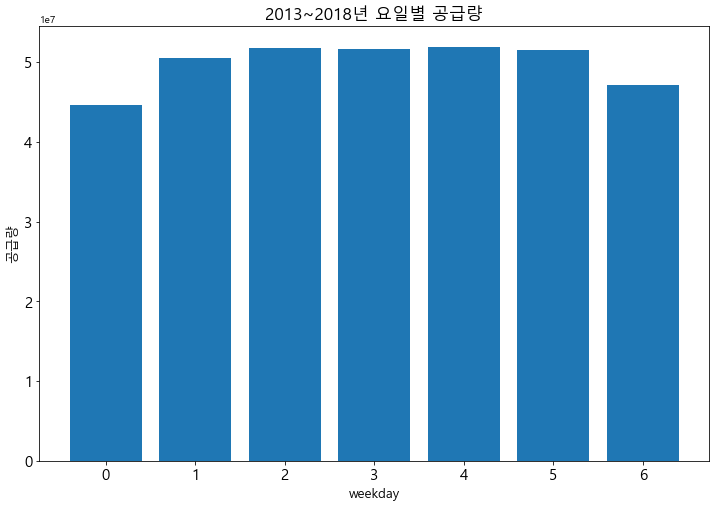

In [28]:
plt.figure(figsize=(12,8))
plt.bar(total['weekday'].unique(), total.groupby(['weekday'])['공급량'].sum())
plt.xlabel('weekday', fontdict={'fontsize':13})
plt.xticks(total['weekday'].unique(), fontsize=15)
plt.ylabel('공급량', fontdict={'fontsize':13})
plt.yticks(fontsize=15)
plt.title('2013~2018년 요일별 공급량', fontdict={'fontsize':17})

Text(0.5, 1.0, '2013~2018년 일별 공급량')

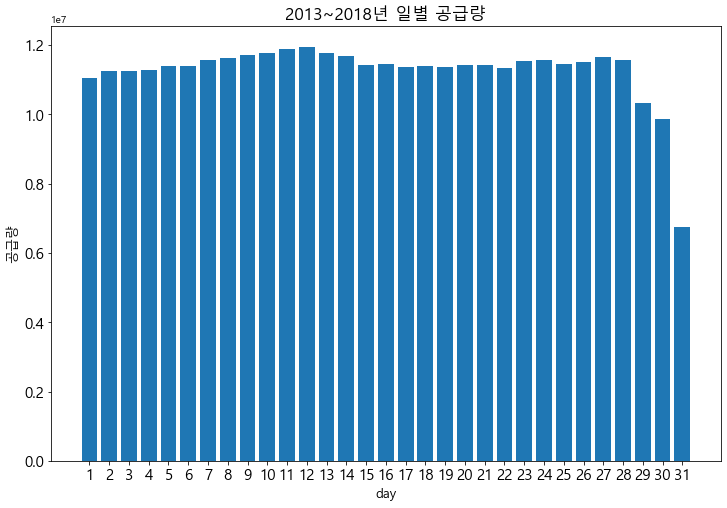

In [29]:
plt.figure(figsize=(12,8))
plt.bar(total['day'].unique(), total.groupby(['day'])['공급량'].sum())
plt.xlabel('day', fontdict={'fontsize':13})
plt.xticks(total['day'].unique(), fontsize=15)
plt.ylabel('공급량', fontdict={'fontsize':13})
plt.yticks(fontsize=15)
plt.title('2013~2018년 일별 공급량', fontdict={'fontsize':17})